# HW1

### What to Hand In

You will turn in a completed notebook on Canvas, as both an HTML and ipynb file. 
- Your submission should be contained in a single Jupyter notebook named `hw1-lastname.ipynb`, where `lastname` is replaced with your last name. 
- **Please also turn in an HTML or PDF version of your notebook.**
- Please create headers for your cells that are labeled ''Deliverable'' followed by the problem number, so that your responses are easy to find.


## Submission Policies

### Note on 4604 vs 5604
Sections labeled as **5604** are only required for INFO-5604 students.
Students in INFO-4604 may optionally do these problems for extra credit
(with the amount of extra credit points indicated as ''EC'' points).

###  Collaboration
You are allowed to work with a partner. You are still expected to write up your own solution. Each individual must post their own submission on Canvas, and you must list the names of your partner in your notebook. 

### Late submissions
We allow each student to use up to 5 late days over the semester. You have late days, not late hours. This means that if your submission is late by any amount of time past the deadline, then this will use up a late day. If it is late by any amount beyond 24 hours past the deadline, then this will use a second late, and so on. Once you have used up all late days, late assignments will not receive credit except in special circumstances. 

### Asking for Help
You are encouraged to ask questions on Canvas. But please do not post anything that you are turning in.
In this assignment, that would be any of the plots you need to hand in, or the parameter values.
However, you can describe your results, like the number of iterations it took to converge,
and general things you observe about the algorithms.You may ask questions to help with debugging, but do not post your code. You can share error messages and describe what you are trying to do with your code, but don't write enough to give away the solution.


The code below shows an object-oriented implementation of a perceptron classifier in Python. Take a minute to read over the code and understand what it is saying.

In [1]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Training a perceptron model on the Iris dataset

In this assignment you will train a perceptron on a classic dataset of observations of Irises (a flower). You can read about the dataset [here](https://en.wikipedia.org/wiki/Iris_flower_data_set).

In [2]:
import os
import pandas as pd


s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

df.columns = ['sepal_len', 'sepal_width', 'petal_len', 'petal_width', 'class']

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,sepal_len,sepal_width,petal_len,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Plotting the Iris data

The code below shows how to plot the Iris data.

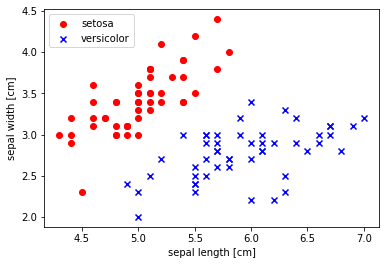

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100][["sepal_len", "sepal_width"]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

### Training the perceptron model

The code below shows how to train the Perceptron

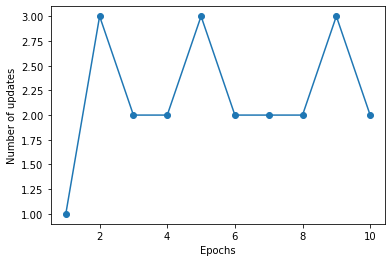

In [4]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

# Deliverable 1

The code from the book uses two variables, sepal length and petal length.
This is not actually a very interesting example, because the points are completely separated by only one of these dimensions (petal length), so it is easy to learn.
In other words, if you only used this one feature, you could still learn a classifier, rather than needing two features.

A more interesting example is with sepal length and sepal width.
The data are still linearly separable in these two dimensions, but it requires a combination of both variables. **Modify the code above to use these two variables**. Include a copy of your modified code in the cell below. When you run it, you will find that the algorithm still makes errors after the default 10 iterations (also called epochs). 

Note: the remaining questions assume you are using the sepal length and sepal width features.

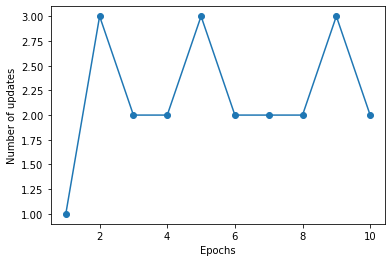

In [5]:
# your modified code here 


# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

#DELIVERABLE
# extract sepal length and sepal width
X = df.iloc[0:100][["sepal_len", "sepal_width"]].values

ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

# Deliverable 2 

Change the `n_iter` parameter of the Perceptron object to 1000, in the code below. Then examine the plot of number of updates vs. epochs. About how many epochs does it take for the perceptron to classify all instances correctly? Provide (1) a rough estimate of the number of epochs based on the plot and (2) an explanation of why you made that estimate, based on the plot.

[Your answers here, and your code below]


*****My Answers:*****
I think that it took the perceptron about 620 epochs to classify all of the instances correctly, because the number of updates finally converged to 0 around the 620th epoch, which indicates that the algorithm learned the correct weights to predict accurately, and did not need to update the weights after this point in the learning process.

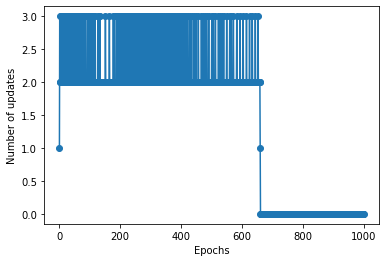

In [6]:
ppn = Perceptron(eta=0.1, n_iter=1000)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

Take some time to examine the function for plotting decision regions below. Make sure you understand roughly what the code is doing. You may need to look up some of the unfamiliar functions in the documentation. This is a very important skill to practice! Reading documentation is crucial.

### A function for plotting decision regions

In [7]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

# Deliverable 

Modify the code below to correctly label the axis, to reflect the features you are using. 

Then examine the plot below and explain what it is showing in your own words. If you are stuck, try thinking about what the perceptron will decide for different values of the input features.

[Your answer here]

*****My Answer:*****
I think that this plot is showing the decision boundary rather incorrectly because it has only been given 10 epochs to try to learn the correct weights, which clearly wasn't enough! Right now it would classify pretty much any new data point as a part of the blue boundary, and if a point was added that should be classified as red, it would be incorrectly classified.

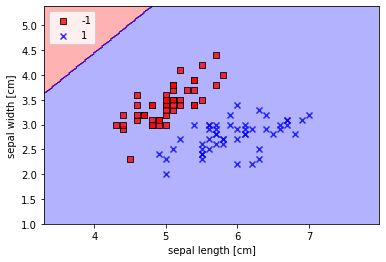

In [8]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_08.png', dpi=300)
plt.show()

# Deliverable 

Using the code above as a model, print out seven boundary figures like the plot above showing the boundry when you run the perceptron for 10, 20, 50, 100, 200, 500, and 1000 iterations. You should show seven different figures.

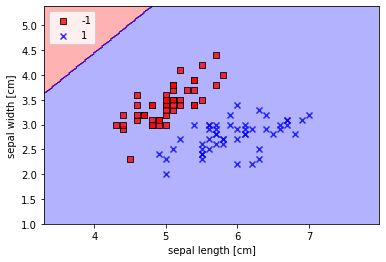

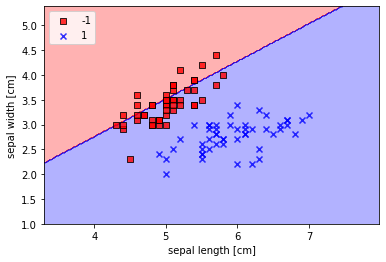

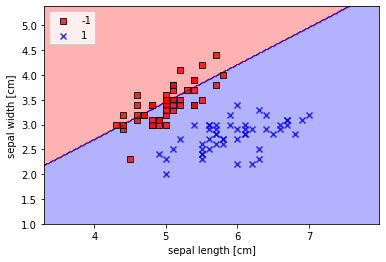

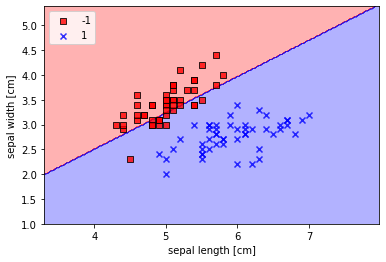

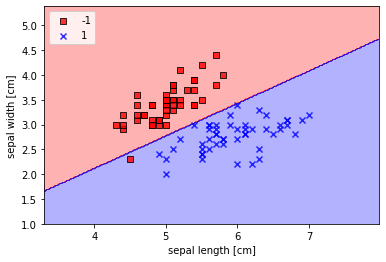

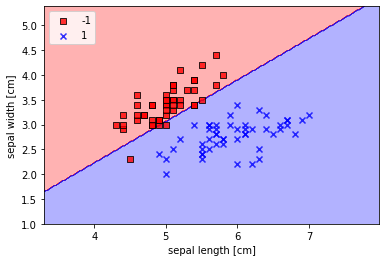

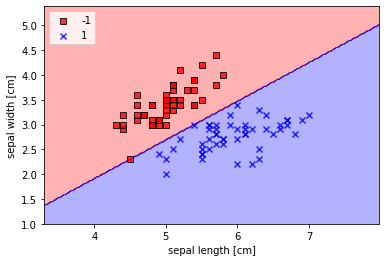

In [9]:
epochs = [10, 20, 50, 100, 200, 500, 1000]

for e in epochs:
    ppn = Perceptron(eta=0.1, n_iter=e)
    ppn.fit(X, y)
    plot_decision_regions(X, y, classifier=ppn)
    plt.xlabel('sepal length [cm]')
    plt.ylabel('sepal width [cm]')
    plt.legend(loc='upper left')
    plt.show()

# Deliverable 

Describe what the seven figures show. Does the boundry change? Can you describe that change? Do the changes make sense?

The boundary does change quite a bit! The changes slowly get closer to the ground truth, and it doesn't show full convergence until 1000 epochs (I think it would get there around 620 based on my original estimate of the convergance of the perceptron based on the graph previously). This happened because as the algorithm learned from its mistakes, it updated the weights, which moved the boundary (the linear separation line) slightly closer to what the accurate prediction boundary would be. The final product does make me a bit concerned that this is overfit though, because it includes on red spot that seems to be a bit of an outlier.. but I suppose we would need some held-out test data to see for sure about that.

# Deliverable 

Examine the weights that are learned by perceptron after 1000 iterations. To do this, print out the values of the w variable of the Perceptron object, which is the weight vector, where $w[0]$ is the "bias" weight. 

1. Write the linear function that is learned, in the form $m_1*x_1$ + $m_2*x_2$ + $b$, based on the parameters in the $w$ vector as described above.
2. Examine the plot of the decision region after 1000 iterations. Does your equation make sense? Does it match the figure?

ANSWERS BELOW THE CODE

In [10]:
#getting the weight vector after 1000 epochs
ppn = Perceptron(eta=0.1, n_iter=1000)
ppn.fit(X, y)
print("WEIGHTS: ", ppn.w_[1:])
print("BIAS: ", ppn.w_[0])

WEIGHTS:  [ 15.53388244 -19.96528172]
BIAS:  -23.983756546363317


[Your answers to 1 and 2 here]

*****Answers:*****

1. $15.53388244x_1$ + $-19.96528172x_2$ + $-23.98375655$
2. Assuming $x_1$ is the sepal length and $x_2$ is the sepal width, this equation does make sense, because it weights the sepal length very heavily, meaning that the higher the sepal length, the more likely the perceptron returns > 0, which would be within blue decision boundary (verscicolor category). Also, it weights the sepal width very negatively, which means that the higher the sepal width, the more likely the perceptron returns < 0 which would be within the red decision boundary (setosa category). The bias is -23.98... which implies that in general, a new data point is more likely to be in the < 0 decision boundary, which is the red decision boundary, which means setosa might be more likely to occur in this dataset (or at least that pedals are more likely to be classified as setosa in this dataset).

### Winnow [5604]

5604 students should refer to the attached winnow.pdf for instructions on this question. Then in the cells below please include
 
1. Your Winnow implementation
2. A plot showing the number of updates vs. epochs when using 10 iterations, using Winnow
3. A plot showing the decision boundry after 10 iterations, using Winnow
4. The linear function that is learned, of the form $m_1*x_1$ + $m_2*x_2$ + $b$

In [11]:
# DELIVERABLE 1) WINNOW IMPLEMENTATION
import numpy as np


class Winnow(object):
    """Winnow classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        #OLD VERSION
        #self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        #NEW VERSION (MAKE W VECTOR ALL 1S THE SAME LENGTH AS X)
        #THIS IS THE PART THAT I AM PRETTY SURE I AM MESSING UP
        self.w_ = np.ones(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                update = self.eta * (target - prediction)
                if target > prediction:
                    self.w_[1:] *= self.eta *xi
                    self.w_[0] *= self.eta
                elif target < prediction:
                    self.w_[1:] /= self.eta *xi
                    self.w_[0] /= self.eta
                #adding up the errors
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        #OLD CODE: If condition of >= 0 is true, return 1, otherwise return -1
        #return np.where(self.net_input(X) >= 0.0, 1, -1)
        #NEW CODE: If condition of >= 100 is true, return 1, otherwise return -1
        return np.where(self.net_input(X) > 100.0, 1, -1)

When you run this, use the variables sepal length and petal length. (The algorithm won’t
work if you use sepal length and sepal width, for reasons we won’t get into.)
In the code, set the parameter eta to 1.0 (it won’t behave as expected if η < 1, which is the
default, so you need to change it), and set n iters to 10.
You may notice that when η (eta) is 1, the bias weight will never change. This is okay; the
algorithm will still work, but the bias won’t contribute anything to the prediction rule.
If you run everything correctly, it should converge after 5 epochs.

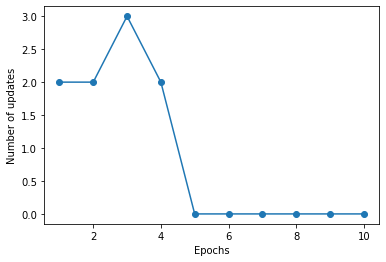

In [12]:
# DELIVERABLE 2) A plot showing the number of updates vs. epochs when using 10 iterations, using Winnow
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
# extract sepal length and petal length
X = df.iloc[0:100][["sepal_len", "petal_len"]].values

wn = Winnow(eta=1.0, n_iter=10)

wn.fit(X, y)

plt.plot(range(1, len(wn.errors_) + 1), wn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

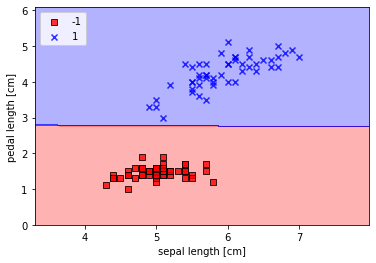

In [13]:
# DELIVERABLE 3) A plot showing the decision boundry after 10 iterations, using Winnow
plot_decision_regions(X, y, classifier=wn)
plt.xlabel('sepal length [cm]')
plt.ylabel('pedal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [14]:
print('WEIGHTS: ', wn.w_[1:])
print('BIAS: ', wn.w_[0])

WEIGHTS:  [ 0.31213232 35.20483824]
BIAS:  1.0


# DELIVERABLE 4) Function that was learned:

$0.31213232*x_1$ + $35.20483824*x_2$ + $1$